In [11]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
 
# Define a local backend
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
backend = FakeManilaV2()
 
# Define a real backend
# from qiskit_ibm_runtime import QiskitRuntimeService
# service = QiskitRuntimeService()
# backend = service.least_busy(operational=True, simulator=False)
 
from qiskit import QuantumCircuit
 
circuit = QuantumCircuit(4)
circuit.h(range(2))
circuit.cx(0,1)
circuit.measure_all() # measurement!

circuit.draw(output='mpl')
 
# Circuits must obey the ISA of the backend.
# Convert to ISA circuits
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

In [12]:
sampler = Sampler(mode=backend)
 
job = sampler.run([isa_circuit])
 
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result)
 
# Get counts from the classical register "meas".
print(f" >> Meas output register counts: {pub_result.data.meas.get_counts()}")

SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=4>)), metadata={'shots': 1024, 'circuit_metadata': {}})
 >> Meas output register counts: {'0000': 257, '0010': 264, '0001': 252, '0011': 251}


/home/henning/.local/lib/python3.10/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


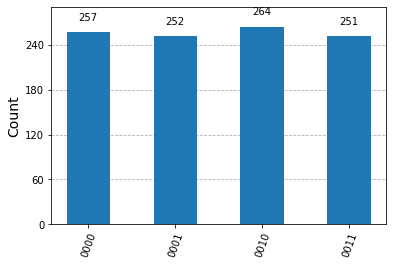

In [13]:
from qiskit.visualization import plot_histogram
plot_histogram(pub_result.data.meas.get_counts())

